# Question 1

| Experience (Years)    | Salary ($1000) |
| --------              | ------- |
| 1.2                   | 42      |
| 2.5                   | 46      |
| 3.1                   | 51      |
| 3.9                   | 58      |
| 5.2                   | 62      |


1. Build a model that can help you automatically predict the salary of an employee given their years of experience. Write down the equation of your model’s hypothesis.

2. Use your hypothesis to predict the salary of an employee with 4.5 years of experience.

3. Interpret the coefficients of your hypothesis.

--------------------------------------

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
experience_years = np.array([1.2, 2.5, 3.1, 3.9, 5.2])
salary_1000 = np.array([42, 46, 51, 58, 62])

The data is numeric and just by observation it seems that there is a proportional increase in the salary as we increase the number of years of experience, thus we will fit a linear regression model. We will plot as well to show this.

In [3]:
X = experience_years.reshape(-1, 1)
y = salary_1000

model = LinearRegression()
model.fit(X, y)

LinearRegression()

We take $X$ as the experience in years, with $f(X)$ being the salary in $1000. Thus we will have the following prediction / hypothesis equation:

$f(X) = \beta_0 + \beta_1 X$

In [4]:
print(f'B_0 = {model.intercept_}')
print(f'B_1 = {model.coef_[0]}')

B_0 = 34.6475300400534
B_1 = 5.393858477970628


In this case, our $\beta_0$ is the Y-intercept, whilst our $\beta_1$ is the coefficient of $X$ (in other words, the coefficeint of the experience in years).

Thus the equation would be:

$f(X) = 34.64753 + 5.3939X$

Interpretation of coefficients:
- An employee with 0 years of experience is expected to earn a salary of $34.64753 \times 1000 $ USD.
- For every 1-year increase in experience, your salary is expected to go up by $5.3939 \times 1000$ USD.

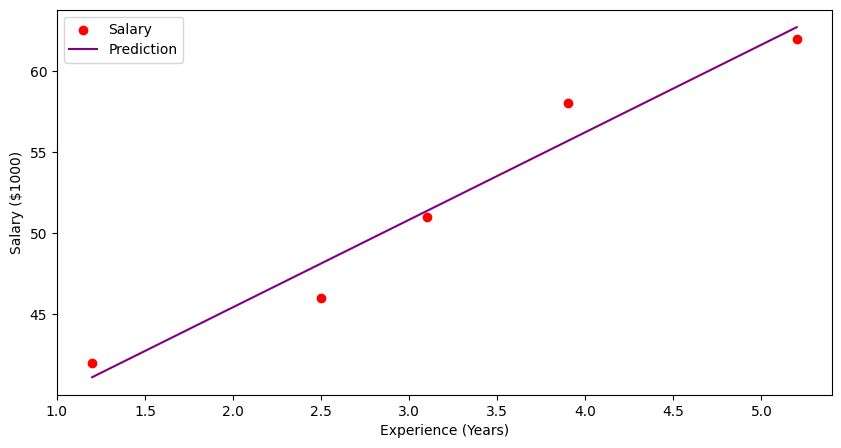

In [5]:
y_pred = model.predict(X)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color = 'red', label="Salary")
plt.plot(X, y_pred, color='purple', label="Prediction")

plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($1000)")

plt.legend()
plt.show()

We can use this model to predict salary at 4.5 years of experience. This would be a simple interpolation.

In [6]:
print(f"Expected salary after 4.5 years of experience = ${model.predict(np.array([[4.5]]))} thousand.")

Expected salary after 4.5 years of experience = $[58.91989319] thousand.


Interpretation: With 4.5 years of experience, an individual is expected to have a salary of around $58,920.

# Question 2

| House Number | Size (Sq. Ft.) | # of Bedrooms | Price ($1000) |
| --------     | --------       | --------      | --------     |
| House 1      | 900            | 1             | 200          |
| House 2      | 1600           | 3             | 330          |
| House 3      | 1875           | 4             | 400          |

You want to build a model to automatically predict the price of a house given its size (in sq. ft.) and number of bedrooms. You decide to build your model analytically.

1. Define your matrix $X$ and your vector $y$.

2. Solve the normal equation and write the equation of the resulting hypothesis.  

3. Predict the price of a house that is 1500 sq. ft. and has 3 bedrooms.

4. Interpret the coefficients of your hypothesis.

--------------------------------------

Let $m$ be the number of features and $n$ be the number of samples we have in total. Then, we define $X \in \mathbb{R}^{n\times m}$ as the feature matrix, and $y \in \mathbb{R}^n$ where $y$ as the target vector.

For some weight $w \in \mathbb{R}^m$, we define the hypothesis as follows:

$h_w(X) = w^TX$

The cost function would thus be the squared difference between our hypothesis $h_w(X)$ and the true value, $y$.

Cost $ = (h_w(X) - y)^2$

Our loss function, $J(w)$, would then calculate the MSE.

$J(w) = \frac{1}{2n} \sum_{i=1}^{n} (h_w(X_i) - y_i)^2$

For all $i \in 1,...,n$.

We want to take the partial derivative of $J$ such that we obtain the optimal value of $w$, which occurs when $\frac{\partial}{\partial w} J(w) = 0$. This is where $J(w)$ is at a (local) minimum.

Our $w$ can be obtained by doing the following calculation:

$ w = (X^T X)^{-1} X^T y $

Let us check the dimensions:

$X \in \mathbb{R}^{3\times2}$

$X^T \in \mathbb{R}^{2\times3}$

$ X^T X \in \mathbb{R}^{2\times2}$

$ (X^T X)^{-1} \in \mathbb{R}^{2\times2}$

$(X^T X)^{-1} X^T \in \mathbb{R}^{2\times3}$

$(X^T X)^{-1} X^T y \in \mathbb{R}^{2\times1}$

Thus, our $w$ vector would be of size $2\times1$. However, this does not account for an intercept term in the linear regression model. Without this, the model would be forced to pass through the origin and would therefore have less flexibility. For this reason, our $X$ is actually $\in \mathbb{R}^{3\times3}$ and thus our $w \in \mathbb{R}^{3}$.

Our model hypothesis would look as follows:

$h_w(X) = w_0 + w_1X_1 + w_2X_2$

Where $X_1$ is the size in square feet and $X_2$ is the number of bedrooms. $w_0$ is the y-intercept, with $w_1$ and $w_2$ being the coefficients of each of the size and num. bedrooms respectively.

In [7]:
X = np.array(
    [
        [1, 900, 1],
        [1, 1600, 3],
        [1, 1875, 4]
    ]
)

y = np.array(
      [200, 330, 400]
)

In [8]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [9]:
print(w)

[ 1.71666667e+02 -6.66666667e-02  8.83333333e+01]


Thus, our $w_i$ values would be as follows:

$w_0 = 171.67$

$w_1 = -0.0667$

$w_2 = 88.33$

Interpretation:
- $w_0$ implies that the base price of any house is 171,670 USD.
- $w_1$ implies that for every unit increase in the square footage of the house, the price actually drops by around 67 USD. This is, however, relatively insignificant as it is an extremely small value. It has probably been calculated as such based on the low number of samples.
- $w_2$ implies that for every unit increase in the number of bedrooms, the price of the house increases by 88,300 USD.

The full hypothesis equation would thus be:

$h_w(X) = 171.67 - 0.0667X_1 + 88.33X_2$

We can plug in the values to get the price of a house that is 1500 sq. ft. and has three bedrooms:

In [10]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]

pred = w_0 + w_1*1500 + w_2*3
print(pred)

336.6666666666782


The price of a house with three bedrooms and 1,500 sq. footage is 336,670 USD based on the linear regressor.

# Question 3

| Individual Number | Income ($1000s) | Age (Years) | Approved (0 or 1) |
| --------          | --------        | --------    | --------          |
| 1                 | 45              | 25          | 0          |
| 2                 | 60              | 35          | 1          |
| 3                 | 75              | 40          | 1          |
| 4                 | 50              | 28          | 0          |
| 5                 | 90              | 50          | 1          |
| 6                 | 100             | 60          | 1          |

You want to build a model to predict whether a new applicant will be approved for a credit card given their income and age.

1. Define a suitable cost function that you will target to optimize for this problem.

2. How many coefficients will you need to optimize in this case?

3. Using the cost function you defined in part (a), derive the update rule for each coefficient that needs to be optimized. Show your work by deriving the expression for the derivative of the cost function with respect to each coefficient.

4. Assuming an initial value of 1 for the first coefficient, 2 for the second coefficient, 3 for the third coefficient, 4 for the fourth coefficient, and so on, run one iteration of gradient descent using a learning rate of 0.01.

5. Calculate the model accuracy using the updated coefficients.

------------------------------------------------

Binary classification $\rightarrow$ logistic regression. Straight forward.

We define $w \in \mathbb{R}^m$ as the weight vector, with $m$ being the number of features, and $X \in \mathbb{R}^{m\times n}$ as the feature matrix. Our hypothesis is defined as follows:

$ h_w(x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}} $

Our cost function would thus be the following:

$ \text{Cost}(h_w(x), y) = \begin{cases} -\text{log}(h_w(x)) &\text{if }y = 1 \\ -\text{log}(1-h_w(x)) &\text{if }y = 0 \end{cases} $


Thus, as a single equation:

$ \text{Cost}(h_w(x), y) = [-y \text{log}(h_w(x))] - [(1-y) \text{log}(1 - h_w(x))]$

Our loss function would follow as such:

$ J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \text{log}(h_w(x_i))] + [(1-y_i) \text{log}(1 - h_w(x_i))] $

For all $i$ corresponding to the number of samples that we are working with.

Since we have two input features (the income and the age), we will have 3 coefficients that we must optimize (corresponding to the income coefficient, age coefficient, and the y-intercept).

The update rule for the coefficients:

We take $J(w)$ as above: $ J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \text{log}(h_w(x_i))] + [(1-y_i) \text{log}(1 - h_w(x_i))] $

For $m$ samples, we will have $m$ updates to the weight vector $w$. The update rule for the weights is as follows:

$ w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w) $

For $j \in 1, ..., m$.


We thus have to calculate $ \frac{\partial}{\partial w_j} J(w) $. God help us.


$ \frac{\partial}{\partial w_j} J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \cdot{\frac{\partial}{\partial w_j} \text{log}(\sigma(w^T x_i))}] + [(1-y_i) \cdot {\frac{\partial}{\partial w_j} \text{log}(1 - \sigma(w^T x_i))}] $

First, the deriviative of the sigmoid function is as follows:

$ \sigma'(z) = \sigma(z) (1 - \sigma(z)) \cdot z' $

$ \implies \frac{\partial}{\partial w_j} \sigma(w^T x) = \sigma(w^T x) (1 - \sigma(w^T x)) \cdot \frac{\partial (w^T x)}{\partial w_j} $
$ \implies \frac{\partial}{\partial w_j} \sigma(w^T x) = \sigma(w^T x) (1 - \sigma(w^T x)) \cdot x_j $

We have $ \frac{\partial}{\partial w_j} \text{log}(\sigma(w^T x)) = \frac{\sigma'(w^T x)}{\sigma(w^T x)}$

Similarly, we have $\frac{\partial}{\partial w_j} \text{log}(1 - \sigma(w^T x_i)) = \frac{- \sigma'(w^T x)}{1 - \sigma(w^T x)}$

We can then evaluate $\frac{\partial}{\partial w_j} J(w)$ as follows:

$ \frac{\partial}{\partial w_j} J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y_i (1 - \sigma(w^T x_i)) x_{ij}] + [(1-y_i) (- \sigma(w^T x_i)) x_{ij}] $

$\implies \frac{\partial}{\partial w_j} J(w) = \frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T x_i) - y_i) x_{ij} $

Plugging this back into the update rule for $w$:

$ w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w) $
$\implies w_j := w_j - \alpha [\frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T x_i) - y_i) x_{ij}]$

We can separate this for each of the $x_i$ terms:

$w_0 = w_0 - \alpha \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)})$

$w_1 = w_1 - \alpha \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)}) x_1^{(i)}$

$w_2 = w_2 - \alpha \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)}) x_2^{(i)}$

Now, assume $w_0 = 1$, $w_1 = 2$, etc..., run one iteration of grad. descent with an LR of 0.01.

In this case, we have our $w$ matrix as $w^{(0)} = [1, 2, 3]$.

Thus:

$w_0^{(1)} = w_0^{(0)} - 0.01 \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)})$

$w_1^{(1)} = w_1^{(0)} - 0.01 \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)}) x_1^{(i)}$

$w_2^{(1)} = w_2^{(0)} - 0.01 \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)}) x_2^{(i)}$

We will demonstrate the first case:

$w_0^{(1)} = w_0^{(0)} - 0.01 \frac{1}{n} \sum_{i = 1}^n (σ(x^{(i)}) - y^{(i)})$

$ \implies w_0^{(1)} = 1 - 0.01 (\frac{1}{6} \sum_{i = 1}^6 (\sigma(x^{(i)}) - y^{(i)}))$

We must calculate the $\sigma(x^{(i)})$ for each of the 6 samples.

For all 6 samples, $\sigma(x)$ is 1.

Thus: $ (\frac{1}{6} \sum_{i = 1}^6 (\sigma(x^{(i)}) - y^{(i)})) = \frac{1}{6} [(1 - 0) + (1 - 1) + (1 - 1) + (1 - 0) + (1 - 1) + (1 - 1)]$

$ \implies \frac{1}{6} (2) = \frac{2}{6} = 0.33333$

Thus $w_0^{(1)} = 1 - 0.01(\frac{1}{3}) $

$\implies w_0^{(1)} = 0.99666666666$


The remainder of the $w$s will be calculated computationally.

In [11]:
X = np.array(
    [
    [1, 45, 25],
    [1, 60, 35],
    [1, 75, 40],
    [1, 50, 28],
    [1, 90, 50],
    [1, 100, 60]
]
             )

y = np.array(
    [0, 1, 1, 0, 1, 1]
    )

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = np.array([1.0, 2.0, 3.0])
LR = 0.01
n = 6

hypothesis = sigmoid(X @ w)

grad = (1 / n) * (X.T @ (hypothesis - y))

w_new = w - LR * grad

print(w_new)

[0.99666667 1.84166667 2.91166667]


After one iteration of gradient descent, our new $w$ values are as follows:

- $w_0 = 0.99667$
- $w_1 = 1.84167$
- $w_2 = 2.91167$

In [12]:
## Extra stuff:

def gradient_descent(income, age, approved, initial_w, learning_rate, n_iterations):
    w = np.array(initial_w, dtype=float)
    m = len(approved)

    for _ in range(n_iterations):
        z = w[0] + w[1] * income + w[2] * age
        h = sigmoid(z)

        error = h - approved

        grad_w0 = (1 / m) * np.sum(error)
        grad_w1 = (1 / m) * np.sum(error * income)
        grad_w2 = (1 / m) * np.sum(error * age)

        w[0] -= learning_rate * grad_w0
        w[1] -= learning_rate * grad_w1
        w[2] -= learning_rate * grad_w2


    return w

In [13]:
income = np.array([45, 60, 75, 50, 90, 100])
age = np.array([25, 35, 40, 28, 50, 60])
approved = np.array([0, 1, 1, 0, 1, 1])

weights_1_iter = gradient_descent(income, age, approved, initial_w=[1, 2, 3], learning_rate=0.01, n_iterations=1)
print("Final weights:", weights_1_iter)

Final weights: [0.99666667 1.84166667 2.91166667]


To get the model accuracy after 1 iteration:

In [14]:
hypothesis = sigmoid(X @ weights_1_iter)

y_pred = (hypothesis >= 0.5).astype(int)

accuracy = np.mean(y_pred == y) * 100
print(f'Accuracy with initial weights = {accuracy:.2f}%')

Accuracy with initial weights = 66.67%


We can see that after one iteration of gradient descent, we have an accuracy of 66.67%. However, let's say we wanted to run it for 100 iterations instead. What would happen to the accuracy?

In [15]:
weights_100_iter = gradient_descent(income, age, approved, initial_w=[1, 2, 3], learning_rate=0.01, n_iterations=100)
print("Final weights:", weights_100_iter)

hypothesis = sigmoid(X @ weights_100_iter)

y_pred = (hypothesis >= 0.5).astype(int)

accuracy = np.mean(y_pred == y) * 100
print(f'Accuracy with initial weights = {accuracy:.2f}%')

Final weights: [ 0.85498903 -0.84256442  1.45643132]
Accuracy with initial weights = 66.67%


Still the same. Maybe the model is just bad at prediction?

# Question 4

You built a model that can predict whether a customer would churn (i.e., leave the company) (1 = churn, 0 = no churn) using a number of features, with one them being $x$ (salary – in thousands of dollars). In the dataset you leveraged to build the model, only 10% of the customers churned. The remaining 90% did not churn. The confusion matrix for applying the model to a test set is as follows:

| Actual\Predicted | No Churn (0) | Churn (1) |
| --------         | --------     | --------  |
| **No Churn (0)** | 180          | 20        |
| **Churn (1)**    | 70           | 30        |

1. Calculate the accuracy, precision, recall, and F1 score for the model.

2. Interpret the F1 score and explain when it is more useful than accuracy.

3. Suppose the coefficient corresponding to the feature “salary” in the model you built is −0.6. For an employee with a salary of 30,000 USD, the probability of churning is 0.63. What would the probability of churning be if the company were to increase this employee's salary to 31,000 USD?

--------------------------------

In [16]:
TP = 30
TN = 180
FP = 20
FN = 70

## This is just straight forward calculations

acc = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1-Score = {f1}')

Accuracy = 0.7
Precision = 0.6
Recall = 0.3
F1-Score = 0.4


Interpretation of F1-Score:

We have a low F1-Score of 0.40 or 40%, especially when compared to the accuracy of 0.70 or 70%. This means that the harmonic mean of the precision and recall is less than the geometric mean. Since our dataset is largely imbalanced, the F1-Score is a more reasonable metric to look at for evaluating the performance of the model than the accuracy.

We have a low recall of 0.30, meaning that out of all actual positive points, only 30% of the points were predicted positive, whilst 70% were predicted negative. The precision is also only at 60%, meaning that out of all positively predicted points, only 60% were actually posiive.

We will once again be working with a logistic regression model (binary classification).

$ h_w(x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}} $

We have one intercept term and one coefficient term, thus our weight vector $w$ would consist of two variables to optimize. Let us call them $w_0$ and $w_1$.

The hypothesis function would be:

$h_w(x) = \sigma(w_0 + w_1x)$

$\implies  h_w(x) = \frac{1}{1 + e^{-(w_0 + w_1 x)}}$

We are fiven that the coefficient for salary ($w_1$) is -0.6. We also know that for a salary of 30,000 USD, the probability of churning is 0.63 or 63%.

We must first determine what $w_0$ is given this information, and then use it to calculate the probability of churning when the salary is 31,000 USD.

$ 0.63 = \frac{1}{1 + e^{-(w_0 - 18)}} \implies 1 + e^{-(w_0 - 18)} = \frac{1}{0.63}$

We solve for $w_0$ here to get $w_0 = 18.532$.

The new hypothesis equation would thus be:

$h_w(x) = \frac{1}{1 + e^{-(18.532 -0.6 x)}}$

To verify:

In [17]:
import math
def hyp(x):
  return 1 / (1 + math.exp(-(18.532 - 0.6*x)))

In [18]:
hyp(30)

0.6299494592911709

Thus, we can use this to get the new probability at salary = 31,000 USD:

In [19]:
hyp(31)

0.48300654763905554

We therefore conclude that the probability of churning with a salary of 31,000 USD is 48.3%.

However, we could've also used another method of getting to this value based on the comparison of the original log odds to the new log odds. I am too sick right now to be able to go into the details of that and this is just simpler.

# Question 5

You want to automatically decide whether today would be a good day to play tennis or not based on the day’s outlook, temperature, and humidity. You have some recorded historical data, as shown below:

| Outlook  | Temperature | Humidity | Play Tennis |
| -------- | --------    | -------- | --------    |
| Sunny    | Hot         | High     | No          |
| Sunny    | Hot         | Normal   | Yes         |
| Overcast | Hot         | High     | Yes         |
| Overcast | Mild        | High     | Yes         |
| Sunny    | Mild        | Normal   | No          |

1. Using entropy as the measure of impurity at each node, build a decision tree classifier that can predict whether today would be a good day to play tennis or not based on
outlook, temperature, and humidity. Recall that entropy is calculated as

$H(p_1) = - \sum_{i=1}^{n} p_i \text{log}_2(p_i)$

where $p$ is the fraction of datapoints belonging to class 1 (Yes to Playing Tennis).

2. Use the decision tree classifier to predict whether to play tennis or not for a day with the following features:
    - Outlook: Overcast
    - Temperature: Hot
    - Humidity: Normal

-------------------------------

We have 5 data-points, split into 3 Y and 2 N. Thus P(Yes) = 3/5 and P(No) = 2/5.

Our entropy, $H$, for the whole dataset, can thus be calculated as follows:

$H(\text{Play tennis}) = - (\frac{3}{5}\text{log}_2\frac{3}{5} + \frac{2}{5}\text{log}_2\frac{2}{5}) = 0.971$

We then calculate the information gain for each of the features (Outlook, temperature and humidity):



- For Outlook:

3 instances of Sunny (2 no, 1 yes) and 2 instances of overcast (both yes).

$H(\text{sunny}) = - (\frac{1}{3} \log_2 \frac{1}{3} + \frac{2}{3} \log_2 \frac{2}{3}) = 0.918$

Since all the overcast instances are Yes, then $H(\text{overcast}) = 0$.

Thus:

$H(\text{outlook}) = \frac{3}{5} H(\text{sunny}) + \frac{2}{5}H(\text{overcast}) = 0.551$

The information gain: $H(\text{Play tennis}) - H(\text{outlook}) = 0.420 $

- For Temperature:

3 instances of Hot (2 Yes, 1 No), and 2 instances of Mild (both no).

$H(\text{Hot}) = - (\frac{2}{3} \log_2 \frac{2}{3} + \frac{1}{3} \log_2 \frac{1}{3}) = 0.918$

Since all the overcast instances are No, then $H(\text{Mild}) = 0$.

$H(\text{Temperature}) = \frac{3}{5} H(\text{Hot}) + \frac{2}{5}H(\text{Mild}) = 0.551$


The information gain: $H(\text{Play tennis}) - H(\text{Temperature}) = 0.420 $

- For Humidity:

3 instances of High (1 Yes, 2 No) and 2 instances of Normal (1  Yes, 1 No).

$H(\text{High}) = - (\frac{1}{3} \log_2 \frac{1}{3} + \frac{2}{3} \log_2 \frac{2}{3}) = 0.918$

$H(\text{Normal}) = \frac{1}{2}\log_2 \frac{1}{2} + \frac{1}{2} \log_2 \frac{1}{2} = 1 $

$H(\text{Humidity}) = \frac{3}{5} H(\text{High}) + \frac{2}{5}H(\text{Normal}) = 0.951$

The information gain: $H(\text{Play tennis}) - H(\text{Humidity}) = 0.020 $

We thus have the information gain for the three features as follows:

- Outlook: 0.420
- Temperature: 0.420
- Humidity: 0.020

The highest are the outlook and temperature, so we can select either of them as our root node.



In [20]:
df = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Overcast", "Sunny"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Mild"],
    "Humidity": ["High", "Normal", "High", "High", "Normal"],
    "Play Tennis": ["No", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(df)

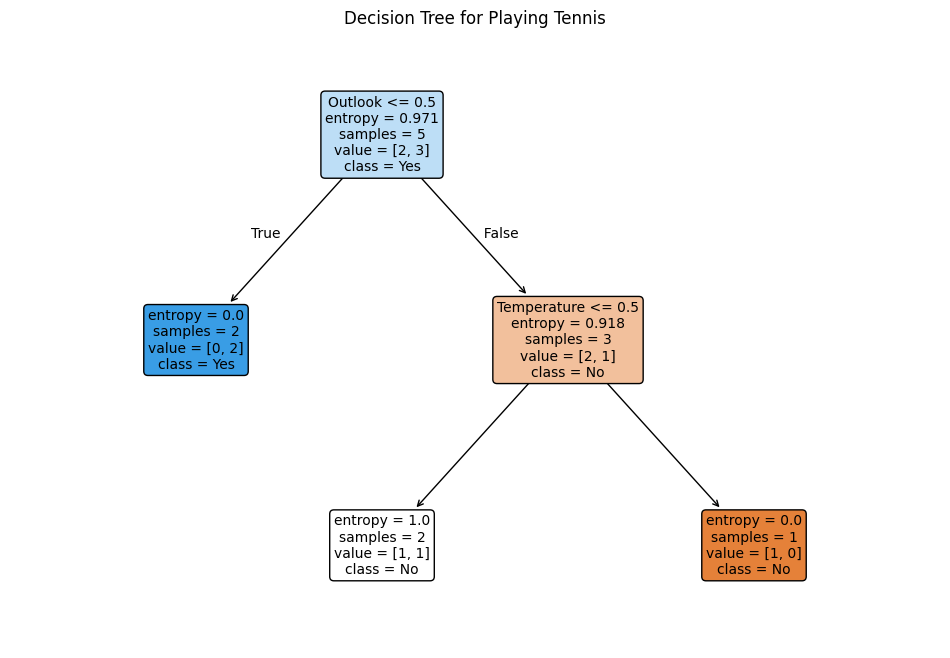

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = df.apply(encoder.fit_transform)

X = encoded_data[["Outlook", "Temperature", "Humidity"]]
y = encoded_data["Play Tennis"]

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf.fit(X, y)


plt.figure(figsize=(12, 8))

plot_tree(
    clf,
    feature_names=["Outlook", "Temperature", "Humidity"],
    class_names=encoder.classes_,
    filled=True,
    fontsize=10,
    rounded=True,
    proportion=False,
    impurity=True
)

plt.title("Decision Tree for Playing Tennis")
plt.show()



Since all the outcomes in which an overcast outlook is Yes, that means that immediately, just by knowing that it is overcast, we will choose to play tennis (as indicated with the decision tree generated as well).